In [225]:
import numpy as np
import pandas as pd
import seaborn as sn

# Data Extraction

In [97]:
data = pd.read_csv('/home/satish/Downloads/sonar.all-data', header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [98]:
x = data.values[:,:60]
#x.shape      #(208, 60)

y = data.values[:,60:]
#y.shape      #(208, 1)

In [237]:
#convert R and M into numeric values 
#coz Random Forest works only on numeric values

_list = []
for i in y:
    if i == 'M':
        _list.append(1)
    else:
        _list.append(0)
y1 = np.asarray(_list)
#y1

In [233]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y1, test_size = 0.2, random_state = 100)

In [234]:
#x_train.shape   #(166, 60)
#x_test.shape   #(42, 60)

# Random Forest

In [315]:
#algo for random forest classification

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 20, criterion = 'gini', random_state = 100)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
#y_pred

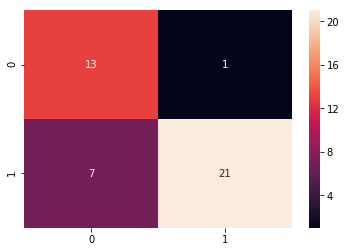

In [316]:
#checking model usability

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
sn.heatmap(confusion_matrix(y_test, y_pred), annot = True)

In [317]:
accuracy = accuracy_score(y_test, y_pred)
print('accuracy = ', accuracy)

class_report = classification_report(y_test, y_pred, target_names = ['Rocks-0', 'Mines-1'])
print('\nclassification_report : ')
print(class_report)

accuracy =  0.8095238095238095

classification_report : 
              precision    recall  f1-score   support

     Rocks-0       0.65      0.93      0.76        14
     Mines-1       0.95      0.75      0.84        28

   micro avg       0.81      0.81      0.81        42
   macro avg       0.80      0.84      0.80        42
weighted avg       0.85      0.81      0.81        42



Text(0.5, 1.0, 'Accuracy vs Number of trees')

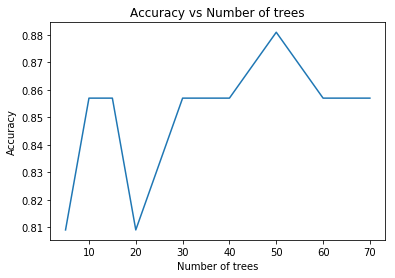

In [318]:
#plot of accuracy vs no. of trees

n_estimators = [5, 10, 15, 20, 30, 40, 50, 60, 70]
accuracy = [0.809, 0.857, 0.857, 0.809, 0.857, 0.857, 0.881, 0.857, 0.857]

import matplotlib.pyplot as plt
plt.plot(n_estimators, accuracy)
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of trees')

# Hyperparameter tuning in Random Forest

In [338]:
#find out all the parameters with their default values

from pprint import pprint
pprint(classifier.get_params())

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 20,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 100,
 'verbose': 0,
 'warm_start': False}


In [320]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 20, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [321]:
# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
classifier_random = RandomizedSearchCV(estimator = classifier, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
classifier_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.3min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [322]:
#prints the best parameters which should be used for training the model
classifier_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [323]:
#function to calculate model performance

def evaluate(model, x_test, y_test):
    y_pred = model.predict(x_test)
    errors = abs(y_pred - y_test)
    accuracy = accuracy_score(y_test, y_pred)
    mean_error = np.mean(errors)
    print('Model Performance')
    print('Average Error: {:0.4f}'.format(mean_error))
    print('Accuracy = {:0.2f}'.format(accuracy))
    print()
    
    return accuracy

base_model = RandomForestClassifier(n_estimators = 20, random_state = 100)
base_model.fit(x_train, y_train)
base_accuracy = evaluate(base_model, x_test, y_test)

best_model = classifier_random.best_estimator_
best_accuracy = evaluate(best_model, x_test, y_test)

print('Improvement of {:0.2f}'.format((best_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.1905
Accuracy = 0.81

Model Performance
Average Error: 0.0952
Accuracy = 0.90

Improvement of 0.12


# Support Vector Machine

In [324]:
#algo used for svm

from sklearn import svm
model_svm = svm.SVC(kernel="linear",gamma = 'scale')
model_svm.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [326]:
#values predicted by the model

y_pred = model_svm.predict(x_test)
y_pred

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [332]:
#determine the usability of the svm model

acc_model_svm = accuracy_score(y_test, y_pred)
print('accuracy_score_svm = ',acc_model_svm)

accuracy_score_svm =  0.7857142857142857


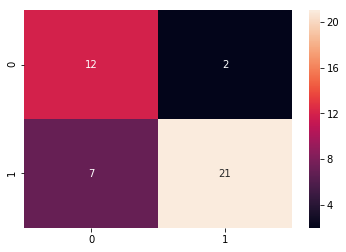

In [333]:
sn.heatmap(confusion_matrix(y_test, y_pred), annot = True)

In [334]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.86      0.73        14
           1       0.91      0.75      0.82        28

   micro avg       0.79      0.79      0.79        42
   macro avg       0.77      0.80      0.78        42
weighted avg       0.82      0.79      0.79        42



# Hyperparameter tuning in SVM

In [339]:
#prints all the parameters used in the model with their default values

from pprint import pprint
pprint(model_svm.get_params())

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [336]:
#to avoid the warning message

import warnings
warnings.filterwarnings("ignore")

{'kernel': 'linear', 'gamma': 0.001, 'C': 10}

In [340]:
#find out the best parameters to be used with their best values

from sklearn.model_selection import RandomizedSearchCV

Cs = [ 0.1, 1, 10,100]
gammas = [ 0.1,1,10]
kernel=["rbf","poly","linear"]
random_search = {'C': Cs, 'gamma' : gammas,"kernel":kernel}
grid_search = RandomizedSearchCV(svm.SVC(), param_grid, cv=5,verbose=0,random_state=0)
grid_search.fit(x, y)
grid_search.best_params_

{'kernel': 'linear', 'gamma': 0.001, 'C': 10}

In [341]:
#train the model using best parameters

svc_best=svm.SVC(kernel="rbf",C=100,gamma=0.1)
svc_best.fit(x_train,y_train)
svc_predict=svc_best.predict(x_test)

In [342]:
acc_model_svm = accuracy_score(y_test,svc_predict)
print('accuracy_score = ',acc_model_svm)

accuracy_score =  0.8333333333333334


# Decision Trees

In [343]:
#algo used to train the Decision Tree Model

from sklearn import tree
model_tree = tree.DecisionTreeClassifier()
model_tree = model_tree.fit(x_train, y_train)

In [344]:
y_pred = model_tree.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [345]:
print('Accuracy_score = ', accuracy_score(y_test, y_pred))

Accuracy_score =  0.7142857142857143


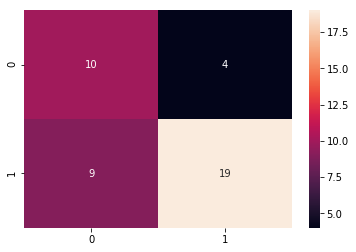

In [227]:
sn.heatmap(confusion_matrix(y_test, y_pred), annot = True)

In [220]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.71      0.61        14
           1       0.83      0.68      0.75        28

   micro avg       0.69      0.69      0.69        42
   macro avg       0.68      0.70      0.68        42
weighted avg       0.73      0.69      0.70        42



# Hyperparameter tuning in Decision Tree

In [346]:
dc=tree.DecisionTreeClassifier()
#maximum depth
max_depth=[4,6,8,10]
#min number of samples required for split
min_samples_split=[4,8,10,12]
#min number of samples required as each leaf node
min_samples_leaf=[2,3,4,5,6]

In [347]:
param_grid_dc={"max_depth":max_depth,"min_samples_split":min_samples_split,"min_samples_leaf":min_samples_leaf}

In [348]:
dc_random=RandomizedSearchCV(estimator=dc,param_distributions=param_grid_dc,cv=5)

In [349]:
dc_random.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'max_depth': [4, 6, 8, 10], 'min_samples_split': [4, 8, 10, 12], 'min_samples_leaf': [2, 3, 4, 5, 6]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [355]:
#best parameters to be used
dc_random.best_params_

{'min_samples_split': 4, 'min_samples_leaf': 4, 'max_depth': 6}

In [356]:
#train the model using best parameters
dc_best=tree.DecisionTreeClassifier(min_samples_split=5,min_samples_leaf=4,max_depth=4)
dc_best.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [357]:
#predict the result using the best model
dc_predict=dc_best.predict(x_test)
dc_predict

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0])

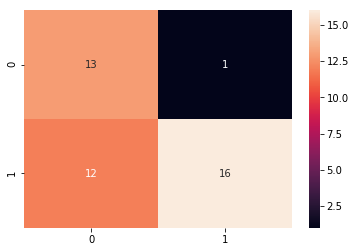

In [358]:
sn.heatmap(confusion_matrix(y_test,dc_predict),annot = True)

In [359]:
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
precision = cm[0][0]/(cm[0][0]+cm[0][1])
recall = cm[0][0]/(cm[0][0]+cm[1][0])
print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall :",recall)

Accuracy:  0.7142857142857143
Precision:  1.0
Recall : 0.5384615384615384
